# Final Results Comparison

#### Authors:
- Izquierdo Alvarez, Mario
- Romero Romero, Martín

This notebook aims to **compare** the obtained results between **custom** and **pretrained** models for both **validation** and **test** sets.

In [1]:
import keras
from keras import layers
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from rich import print

from tensorflow.keras.utils import image_dataset_from_directory

## Utility functions

In [2]:
def csv_to_dict(path):
    # Read the CSV file
    data = pd.read_csv(path)
    
    # Ensure 'model_name' and 'accuracy' columns exist
    if 'model_name' not in data.columns or 'accuracy' not in data.columns:
        raise ValueError("The CSV must contain 'model_name' and 'accuracy' columns")
    
    # Convert to dictionary
    models_dict = pd.Series(data.accuracy.values, index=data.model_name).to_dict()
    
    return models_dict

In [3]:
def plot_results_grouped(results_dicts, title='Accuracy for Custom and Pretrained Models', figsize=(20, 10), font_size=12, y_lim = None):
    ''' 
    This function allows plotting several configurations of different methods on the same bar plot.
    A dictionary with each method as the key and with configurations and results dict as the value will be used as input.
    Example: {'Method_1': {'config_1':(1, 0.5), ...}, 'Method_2':{...}...}. Each Method will be plotted with a different color.
    '''
    
    methods = list(results_dicts.keys())
    colors = ['seagreen', 'tan', 'tomato', 'gold', 'violet']  # Colors for each method
    color_map = dict(zip(methods, colors[:len(methods)]))
    
    fig, ax = plt.subplots(figsize=figsize)
    width = 0.35  # Bar width
    
    total_configs = sum([len(results_dicts[method]) for method in methods])  # Total configurations
    x = np.linspace(0, total_configs * width * 1.5, total_configs)  # Spacing
    
    max_value = 0  # Initialize max value for accuracy
    
    current_position = 0
    for method in methods:
        labels = list(results_dicts[method].keys())
        results = list(results_dicts[method].values())
        
        # Update max_value if current results contain a new max
        max_value = max(max_value, max(results))
        
        # Creating the bars for each method
        rects = ax.bar(x[current_position:current_position+len(labels)], results, width,
                       label=method, color=color_map[method], alpha=0.7)
        ax.bar_label(rects, padding=3, fontsize=font_size)
        
        current_position += len(labels)  # Update the position for the next group of bars
    
    ax.set_ylabel('Accuracy', fontsize=font_size)
    ax.set_title(title, fontsize=font_size + 2)
    
    all_labels = [config for method in methods for config in results_dicts[method]]
    ax.set_xticks(x[:len(all_labels)])
    ax.set_xticklabels(all_labels, rotation=45, ha="right", fontsize=font_size)
    
    ax.legend(title="Methods", title_fontsize=font_size, fontsize=font_size)
    
    ax.tick_params(axis='y', labelsize=font_size)
    if y_lim:
        plt.ylim(*y_lim)
    else:
        plt.ylim(0, max_value + 0.1)  # Adjust y_lim to make sure max_value is visible
    
    # Draw a horizontal line at the maximum accuracy value
    plt.axhline(y=max_value, color='brown', alpha=0.6, linestyle='--', label=f'Max Accuracy: {max_value}')
    plt.legend(title="Methods", title_fontsize=font_size, fontsize=font_size)
    
    fig.tight_layout()
    plt.show()

In [5]:
#Function to plot the results
def plot(history):
    accuracy = history.history['accuracy']
    test_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    test_loss = history.history['val_loss']

    epochs = range(1, len(accuracy) + 1)

    # Create subplots and unpack the axes array immediately
    fig, (ax_accuracy, ax_loss) = plt.subplots(1, 2, figsize=(20, 6))  # figsize=(width, height) in inches

    # Plot training and validation accuracy on the first axis
    ax_accuracy.plot(epochs, accuracy, 'b-o', label='Training accuracy')
    ax_accuracy.plot(epochs, test_accuracy, 'r-o', label='Test accuracy')
    ax_accuracy.set_title('Training and Test Accuracy')
    ax_accuracy.legend()
    ax_accuracy.set_xlabel('Epoch')
    ax_accuracy.set_ylabel('Accuracy')

    # Plot training and validation loss on the second axis
    ax_loss.plot(epochs, loss, 'b-o', label='Training loss')
    ax_loss.plot(epochs, test_loss, 'r-o', label='Test loss')
    ax_loss.set_title('Training and Test Loss')
    ax_loss.legend()
    ax_loss.set_xlabel('Epoch')
    ax_loss.set_ylabel('Loss')

    # Display the plot
    plt.show()

## Obtaining the results

All the results have been saved previously for each model for both data tests. In this section, we collect all those results and create several dictionaries to use the utility function `plot_results_grouped`. This allows a clear comparison between pretrained and custom models.

In [6]:
pre_dir = os.path.join('.', 'pretrained')
custom_dir = os.path.join('.', 'custom_models')

pre_val_results_path = os.path.join(pre_dir, 'val_results.csv')
pre_test_results_path = os.path.join(pre_dir, 'test_results.csv')

custom_val_results_path = os.path.join(custom_dir, 'val_results.csv')
custom_test_results_path = os.path.join(custom_dir, 'test_results.csv')

In [7]:
pre_val_results = csv_to_dict(pre_val_results_path)
pre_test_results = csv_to_dict(pre_test_results_path)

custom_val_results = csv_to_dict(custom_val_results_path)
custom_test_results = csv_to_dict(custom_test_results_path)

In [8]:
val_results_dict = {'Custom': custom_val_results, 'Pretrained': pre_val_results}
test_results_dict = {'Custom': custom_test_results, 'Pretrained': pre_test_results}

## Results visualization and comparison

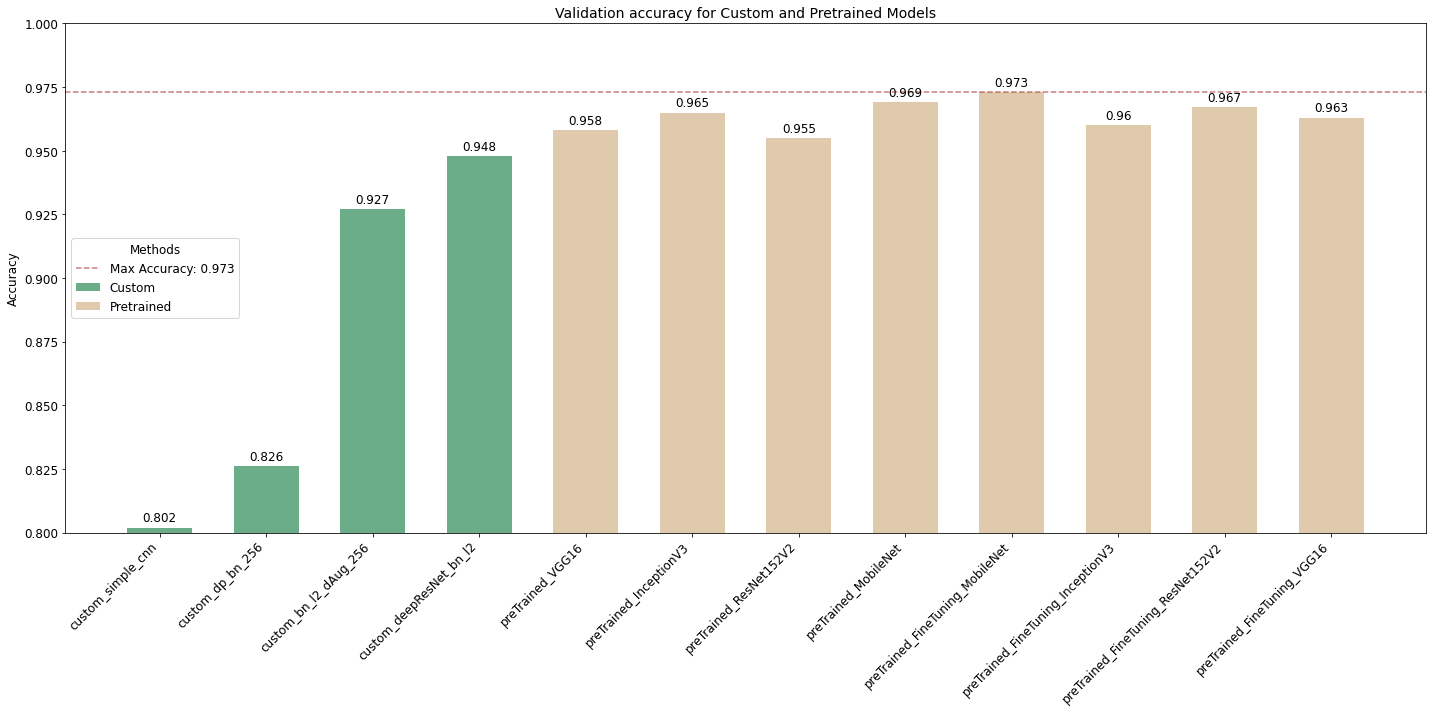

In [9]:
plot_results_grouped(val_results_dict, title='Validation accuracy for Custom and Pretrained Models', y_lim=(0.8,1))

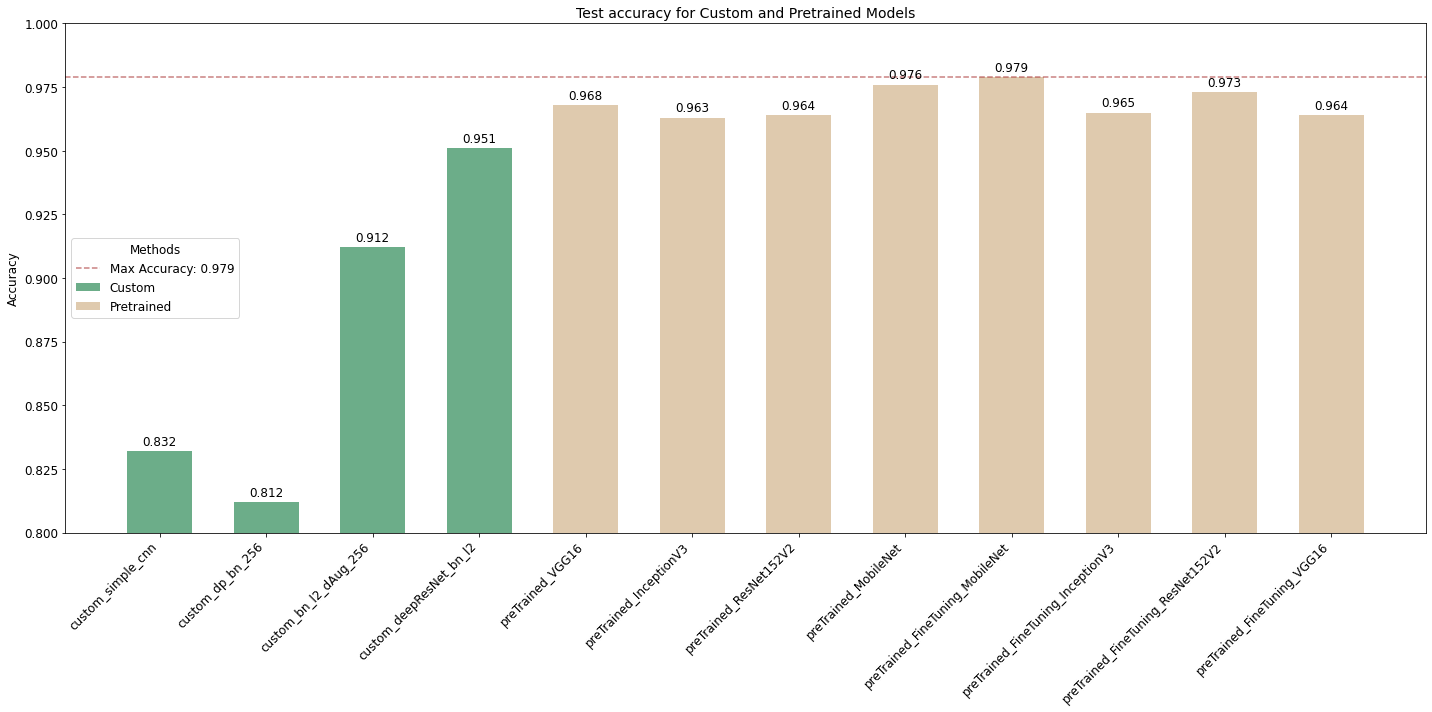

In [10]:
plot_results_grouped(test_results_dict, title='Test accuracy for Custom and Pretrained Models', y_lim=(0.8,1))

### Comparison
As can be seen, the **best** model in terms of accuracy for **both** **Validation** and **Test** data is the **fine-tuned MobileNet**. **All pretrained** models have **yielded better** results than the **custom** ones, as it was **expected** beforehand. The pretrained models have quite complex architectures and have been trained previously with larger amounts of data, leading to better results. However, is noteworthy that some custom models, specially the more complex ones, such us the **custom ResNet** have also achieved great results, getting **quite close** to the pretrained ones.